# Introduction to Qiskit

In this tutorial we will look at the basics of Qiskit, the "Quantum Information Software Kit".

**In brief, what is Qiskit?**

The open-source framework Qiskit allows users to run their quantum circuit-based experimental programs on either a real quantum computer (via cloud access) or on a quantum circuit simulator running on a classical computer (via cloud access or on a local machine).

**Whom this tutorial is written for**

This tutorial is designed for beginners in quantum computing, who have studied the basic concepts discussed in the ELEVATE lecture [Introduction to Quantum Computing](https://wiki.dlr.de/x/lh97Fw) (but not more than that).
The average learner we have in mind is a researcher from another domain, who wants to learn quantum computing in order to evaluate possible applications of this emerging technology for his or her domain.

A high-level goal is to reduce fear of contact with quantum computing by complementing the theoretic, foundational material of the lecture with concrete implementations, to arouse further interest in the topic and provide an entry point for self study and own explorations. 

Ideally, after completing this tutorial you will have a basic understanding of:
- how to implement quantum circuits in Qiskit
- how to simulate circuits using different simulation methods
- how to encode classical data using different encoding schemes

**Installation**

Depending on your platform, please follow the steps outlined 
- here: https://qiskit.org/documentation/stable/0.24/install.html 

In [1]:
## Installation in a new conda environment

# conda create --name qiskitenv
# conda activate qiskitenv
# conda install pip

## After switching to directory containing this notebook and supplements:
# pip install -r requirements.txt

Here you can find additional information:
- Getting started: https://qiskit.org/documentation/getting_started.html
- Release notes: https://qiskit.org/documentation/release_notes.html

In [2]:
import qiskit as qi
import qiskit.tools.jupyter
from qiskit.visualization import state_visualization
from qiskit.quantum_info import Statevector

import qiskit_aer

from IPython.display import display, Math, Latex

%qiskit_version_table

## 1: Basics of circuit creation and simulation

### Defining a quantum circuit 

Let us start by having a look at how quantum circuits are defined in Qiskit.
 
Our first example circuit will be the 2-qubit [Bell state](https://en.wikipedia.org/wiki/Bell_state) $|\Phi^+\rangle $:

![Bell state](https://upload.wikimedia.org/wikipedia/commons/f/fc/The_Hadamard-CNOT_transform_on_the_zero-state.png)

The first two steps of circuit creation are:

- Define how many qubits our circuit should have by instantiating `QuantumCircuit` appropriatley.
- Add gates to the circuit by calling the respective method, indicating the qubits affected.

In [3]:
from qiskit import QuantumCircuit

num_qubits = 2
qc = QuantumCircuit(num_qubits)

# Add a Hadamard gate acting on qubit 0, putting this qubit in superposition.
qc.h(0)

# Add a CX (CNOT) gate acting on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
qc.cx(0, 1)

# Draw the circuit layout
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

*Exercise*

Now as a quick exercise consider the 3-qubit [Greenberger–Horne–Zeilinger state](https://en.wikipedia.org/wiki/Greenberger%E2%80%93Horne%E2%80%93Zeilinger_state):

![GHZcircuit](https://upload.wikimedia.org/wikipedia/en/5/57/The_quantum_logic_gates_that_generates_the_3-qubit_GHZ_state.png)

Tasks:
- Check by manual calculation that the circuit on the left indeed maps the initial state to the state shown on the right. (*Optional reminder task*)
- Implement and draw the circuit following the above example.


In [4]:
# Your code goes here

# For later use, name your circuit as follows:
# circ = ...

┌───┐          
q_0: ┤ H ├──■───────
     └───┘┌─┴─┐     
q_1: ─────┤ X ├──■──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘

*Solution*

In [5]:
# Execute this cell for proper display of Markdown code (including rendered LaTeX)

from IPython.display import Markdown, display
def showsolution(solutionfile : str):
    display(Markdown(open(solutionfile, encoding='utf-8').read()))

Uncomment and execute the following code to display the solution:

In [6]:
# Manual calculation
# showsolution("./solutions/ghz_calc.md")

$|0\rangle|0\rangle|0\rangle \overset{H_0}{\longrightarrow} (|0\rangle+|1\rangle)|0\rangle|0\rangle \overset{C\! X_{01}}{\longrightarrow} (|00\rangle+|11\rangle)|0\rangle \overset{C\! X_{02}}{\longrightarrow} |000\rangle+|111\rangle$

We omitted the prefactor $1/\sqrt(2)$ here by convention, as states are always normalized.

Uncomment and execute the following code to display the solution:

In [7]:
# %load "./solutions/ghz_circ.py"

┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘

### On simulation in Qiskit

For a quantum computer comprised of a small number of qubits (say $~O(10)$), we still can simulate its behavior on a classical computer. 
In general such a computation requires storing $2^n$ complex numbers for the state vector, where $n$ is the number of qubits. The matrices representing e.g. unitary transformations on the states grow even faster with $n$, with $2^n \times 2^n$ complex entries in the generic case. So apart from special cases, classical computers quickly reach a memory and computation bottleneck when it comes to simulating a universal gate based quantum computer with a large numbers of qubits.
However, for learning quantum computing and developing algorithms simulation is a central tool.

Our next goal will be to simulate the above circuit and compare the simulation result with the exact analytic result.
First we treat the case of simulating ideal quantum circuit execution; the case of simulating circuit execution in a noisy (error-prone) device will be treated subsequently.

We will run two kinds of error-free simulationcorresponding to two possible *backends* we can select for running the circuit. 
The term backend can refer to either a (real) quantum system or a high-performance classical simulator of a quantum system.
Our simulation backends used in the following are provided by the **Qiskit Aer** framework:

Generally, Qiskit Aer provides high-performance quantum computing simulators, optionally with realistic noise models. 
It provides interfaces to run quantum circuits with or without noise using multiple different simulation methods.

### Simulation of ideal circuits with the Qiskit Statevector Simulator

The Statevector Simulator can be regarded an auxiliary backend for Qiskit Aer. It simulates the ideal execution of a quantum circuit and returns the final quantum state vector of the device at the end of simulation. This is useful for education, as well as the theoretical study and debugging of algorithms.


To check if the GHZ quantum circuit from the previous exercises really implements the desired state transformation, let us simulate this little circuit and compare the results.

In [8]:
import qiskit_aer

# Run the quantum circuit on a (local) statevector simulator backend
backend = qiskit_aer.AerSimulator(method='statevector')

# Caution: Our circuit needs the save_state instruction if we want to know the statevector
# at the end of the simulation! (Duplicate save_state instructions however throw an error.)
circ.save_state()
print(circ.draw())

# Define a job that runs our circuit
job = backend.run(qi.transpile(circ, backend))


# Read out the results
sv = job.result().get_statevector()
ct = job.result().get_counts()
print("\n", sv)
print("\n", ct)

     ┌───┐           _method_ 
q_0: ┤ H ├──■────■──────░─────
     └───┘┌─┴─┐  │      ░     
q_1: ─────┤ X ├──┼──────░─────
          └───┘┌─┴─┐    ░     
q_2: ──────────┤ X ├────░─────
               └───┘    ░     

 Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))

 {'000': 0.5, '111': 0.5}


The statevector lists all prefactors of possible states in our circuit. Since $0.707... = 1/\sqrt(2)$, we see that we get exactly what we expected, namely the state:

$\frac{1}{\sqrt(2)}\left(|000\rangle + |111\rangle\right)$

The state city plot of our output state shown below plots the real and imaginary parts of the density matrix corresponding to our state.

*Remark*: If you are not familiar with the notion of a [density matrix](https://en.wikipedia.org/wiki/Density_matrix) corresponding to a (pure) state $|\psi \rangle$, you can here just read this as the matrix $M_{|\psi \rangle }$, whose entries are given by $(M_{|\psi\rangle})_{ij} = \psi_{i} \psi_{j}^*$.
Here $\psi_i \in \mathbb{C}$ denotes the complex coefficient of the quantum state $|\psi \rangle \in \mathcal{H}$ with respect to the basis vector $\ket{i}$, that is $|\psi\rangle = \sum_{i}^{} \psi_i |i\rangle$.
As usual, $i=0, ..., \dim{\mathcal{H}}-1$ labels all the basis vectors of a given basis of the Hilbert space $\mathcal{H}$ in consideration, here the standard computational basis.

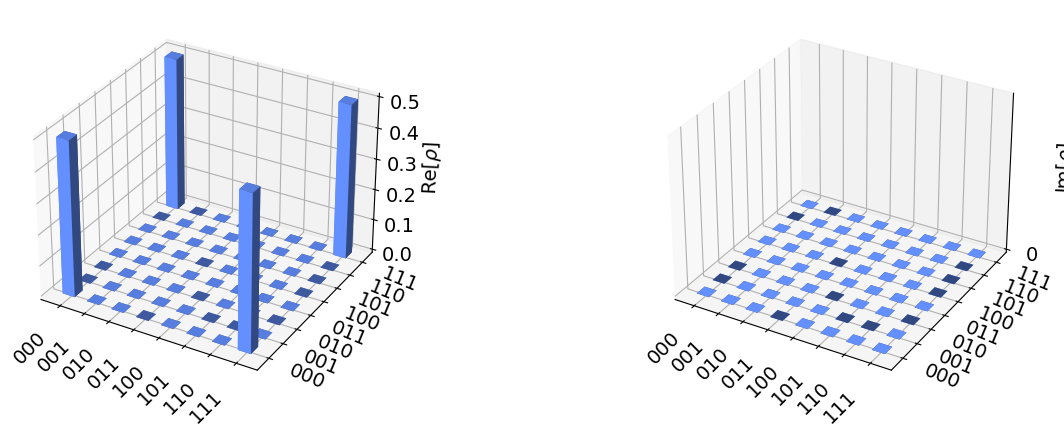

In [9]:
from qiskit.visualization import plot_state_city
plot_state_city(sv)

The following snippets of code are also handy for e.g. briefly checking the output of a given quantum circuit:

In [10]:
# Generate a computational basis vector
# Here lbl should lie between 0 (|0...00>) and  2**n -1 (|1...11>)
n_qubits = 3
lbl, dim = 0, 2**n_qubits
cbvec =  qiskit_aer.quantum_info.AerStatevector.from_int(lbl, dim)

# We can now evolve the statevector using a quantum circuit (for n_qubits=3):
circ = qi.QuantumCircuit(3)
circ.h(0); circ.cx(0, 1);circ.cx(0, 2)
cbvec = cbvec.evolve(circ)

# The state can be drawn (try also with argument 'latex' or 'text') via
cbvec.draw('latex')

/var/folders/9b/289xznkx0x5gfvy53xk9rc_r0000gn/T/ipykernel_5458/1412479459.py:5: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  cbvec =  qiskit_aer.quantum_info.AerStatevector.from_int(lbl, dim)


<IPython.core.display.Latex object>

In [11]:
# Assuming that the initial state is |0...0>, we can also use:
svec  = qiskit_aer.quantum_info.AerStatevector(circ, method='statevector')
#svec.draw('latex')

# Sometimes we want to have access to the raw latex code:
state_to_latex = state_visualization._state_to_latex_ket(svec.data, max_size = 128)
print(state_to_latex)
Latex("$$\\begin{align}" + state_to_latex + "\\end{align}$$")

\frac{\sqrt{2}}{2} |000\rangle+\frac{\sqrt{2}}{2} |111\rangle


<IPython.core.display.Latex object>

However in reality, the state vector -- which corresponds to a quantum mechanical wave function -- cannot be accessed directly, as you have learned in lecture. 
Instead, one needs to conduct (repeated) measurements to find the appropriate distributions.
This leads us to our second simulation method, (again) based on Qiskit's AerSimulator.


*Remark*:
The AerSimulator provides functionality that formerly was provided by the Qasm Simulator, which however is still available as a legacy simulator. QASM is an abbreviation for quantum assembly language. It is a set of text-based instructions to describe and visualize quantum circuits. Qiskit uses a dialect called OpenQASM.

### Simulation of ideal circuits with the Aer simulator

With the AerSimulator we can emulate the execution of a quantum circuits on a (semi-)realistic device and receive *measurement counts*. In contrast to the statevector simulator above, it does *not* yield unphysical amplitude (complex coefficient) information, but rather counts that fluctuate stochastically.

It also includes configurable noise models (to be discussed in a moment), one possibility being to load automatically generated approximate noise models based on the calibration parameters of actual hardware devices.

We can practically do the simulation in Qiskit by creating a new (measurement) circuit to be appended to the previous circuit (circuit composition).
It contains both qubits and classical bits as well as the measurement operation.
The classical bits store the information of the measurement outcome.

In [12]:
# Create a new quantum circuit for the measurement
meas = qi.QuantumCircuit(3, 3) # 3 qubits, 3 classical bits

# Barrier: here only for visual separation of the measurment
meas.barrier(range(3)) 

# Map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

# Draw the circuit
meas.draw()

░ ┌─┐      
q_0: ─░─┤M├──────
      ░ └╥┘┌─┐   
q_1: ─░──╫─┤M├───
      ░  ║ └╥┘┌─┐
q_2: ─░──╫──╫─┤M├
      ░  ║  ║ └╥┘
c: 3/════╩══╩══╩═
         0  1  2

In [13]:
# For a meaningful composition, we also need to add the classical registers (bits) to the previous circuit
circ.add_register(meas.cregs[0]) # add meas' classical registers to our circuit
circ.draw()

┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘
c: 3/═══════════════

In [14]:
# Now compose both circuits
qc = circ.compose(meas)
qc.draw()

┌───┐           ░ ┌─┐      
q_0: ┤ H ├──■────■───░─┤M├──────
     └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
q_1: ─────┤ X ├──┼───░──╫─┤M├───
          └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: ──────────┤ X ├─░──╫──╫─┤M├
               └───┘ ░  ║  ║ └╥┘
c: 3/═══════════════════╩══╩══╩═
                        0  1  2

*Remark*: If we want to measure all qubits, we can also use a shorthand (classical registers will be added automatically):

In [15]:
# Recreate our circuit as above:
circ = qi.QuantumCircuit(3)
circ.h(0); circ.cx(0, 1); circ.cx(0, 2)

# Add measurements:
circ.measure_all()
circ.draw()

┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────■───░─┤M├──────
        └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──┼───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2

Instead of getting the state vector, we now sample the algorithm similar to having it running on a real QC:

In [16]:
# Use the AerSimulator
from qiskit_aer import AerSimulator
aersim = AerSimulator()

# Execute the circuit on the simulator.
# We've set the number of repeats of the circuit (shots)
# to be 1024, which is the default.
job_sim = aersim.run(circ, memory=True, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

With enabled memory  in the run, the 1024 individial measurement outcomes are recorded.
Let's have a look at them:

In [17]:
memory = result_sim.get_memory()
print(memory)

['111', '000', '000', '000', '000', '111', '000', '111', '111', '111', '000', '000', '000', '111', '000', '000', '111', '111', '000', '000', '000', '111', '111', '111', '000', '111', '000', '111', '000', '000', '111', '111', '000', '000', '000', '111', '111', '111', '111', '111', '000', '000', '000', '111', '000', '000', '000', '000', '000', '111', '111', '000', '111', '000', '000', '000', '111', '111', '000', '111', '000', '000', '000', '111', '000', '111', '111', '111', '111', '111', '000', '111', '111', '000', '111', '111', '111', '111', '000', '000', '111', '111', '111', '111', '000', '111', '000', '111', '111', '111', '000', '111', '111', '111', '000', '000', '111', '000', '000', '000', '000', '111', '111', '000', '111', '000', '111', '000', '111', '000', '000', '111', '111', '111', '111', '111', '000', '000', '000', '111', '000', '000', '111', '111', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '111', '000', '111', '000', '111', '111', '000', '000', '111'

For our convenience, there is also the possibility to get the summed counts and a histogram with little effort:

{'000': 504, '111': 520}


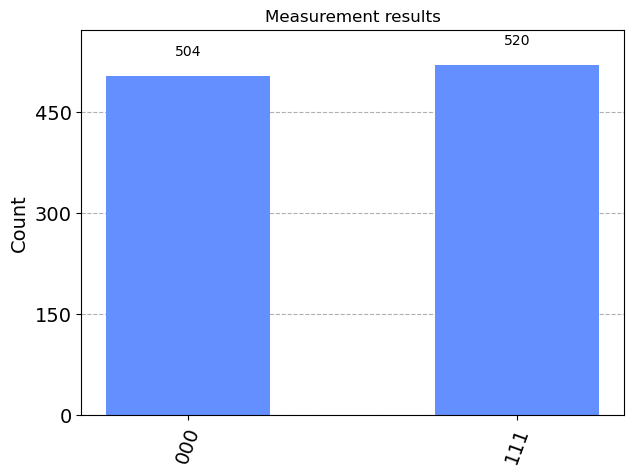

In [18]:
counts = result_sim.get_counts()
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts, title="Measurement results")

Instead of the absolute frequencies of the measurement outcomes we may also plot relative frequencies:

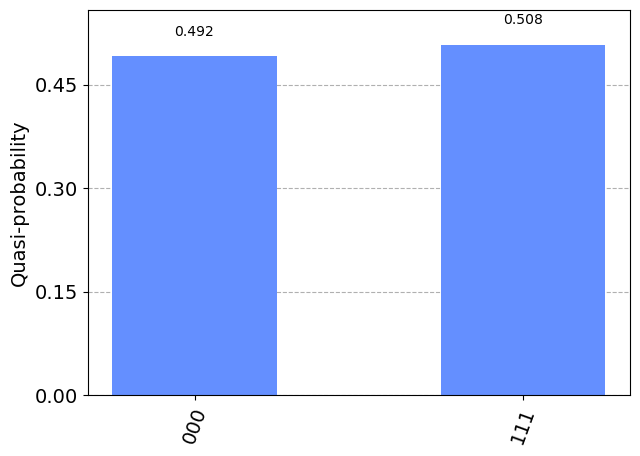

In [19]:
qi.visualization.plot_distribution(counts)

As expected, these empiric, relative frequencies slightly differ from the theoretic probabilites $(1/\sqrt(2))^2 = 0.500 $.
The result from our quantum circuit is intrinsically probabilistic as it performs a quantum experiment. 
Therefore, to achieve a good approximation of the probability distribution of the states, one needs to sample the circuit sufficiently often.

###  Simulation of noisy circuits with the Qiskit device noise model simulator

In the following we want to use a more realistic simulator mimicking the noisy 5-qubit [IBM Vigo device](https://link.springer.com/article/10.1007/s11128-020-02712-7/figures/4) (Fig. from this [paper](https://link.springer.com/article/10.1007/s11128-020-02712-7)) and see how the simulation results will differ from the previously obtained ones.

The figure below shows the coupling map of the device, i.e., indicates which 2-qubit operations are natively supported by the hardware.

![IBM Vigo](./figures/Architecture-of-five-qubit-IBM-vigo-quantum-computer.png)

*Remark 1:* 
The Vigo device used to be accessible as a cloud service backend, but [no longer is](https://docs.quantum-computing.ibm.com/run/retired-systems).
The current online systems are listed [here](https://quantum-computing.ibm.com/services/resources?tab=systems&limit=50).
Other device-based simulators are listed [here](https://qiskit.org/documentation/stable/0.44/apidoc/providers_fake_provider.html).


*Remark 2:* More information on the specific error types used in this device specific error model can be found [here](https://qiskit.org/ecosystem/aer/tutorials/2_device_noise_simulation.html#Generating-a-simulator-that-mimics-a-device).

In [20]:
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakeVigo
device_backend = FakeVigo()
sim_vigo = AerSimulator.from_backend(device_backend)

When running noisy simulations it is critical to transpile the circuit for the respective backend.

Transpilation is the process where a quantum circuit is transformed into a new quantum circuit that performs the same task, but is restructured to be compatible with the physical layout of a particular quantum system and, where possible, optimize its performance. After transpilation, the circuit is composed of the noisy basis gates the backend supports.

If transpilation is skipped, noise from the device noise model will not be applied to gates in the circuit that are supported by the simulator, but not supported by the mimicked backend.

In [21]:
# Circuit definition as above (prepare and measure GHZ state)
circ = qi.QuantumCircuit(3,3)
circ.h(0);circ.cx(0, 1);circ.cx(1, 2)
circ.measure([0, 1, 2], [0, 1, 2])
circ.draw()

┌───┐          ┌─┐      
q_0: ┤ H ├──■───────┤M├──────
     └───┘┌─┴─┐     └╥┘┌─┐   
q_1: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2

In [22]:
# Transpile the circuit for the noisy basis gates
tcirc = qi.transpile(circ, sim_vigo)
tcirc.draw()

global phase: π/4
               ┌─────────┐┌────┐┌─────────┐          ┌─┐      
      q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■───────┤M├──────
               └─────────┘└────┘└─────────┘┌─┴─┐     └╥┘┌─┐   
      q_1 -> 1 ────────────────────────────┤ X ├──■───╫─┤M├───
                                           └───┘┌─┴─┐ ║ └╥┘┌─┐
      q_2 -> 2 ─────────────────────────────────┤ X ├─╫──╫─┤M├
                                                └───┘ ║  ║ └╥┘
ancilla_0 -> 3 ───────────────────────────────────────╫──╫──╫─
                                                      ║  ║  ║ 
ancilla_1 -> 4 ───────────────────────────────────────╫──╫──╫─
                                                      ║  ║  ║ 
          c: 3/═══════════════════════════════════════╩══╩══╩═
                                                      0  1  2

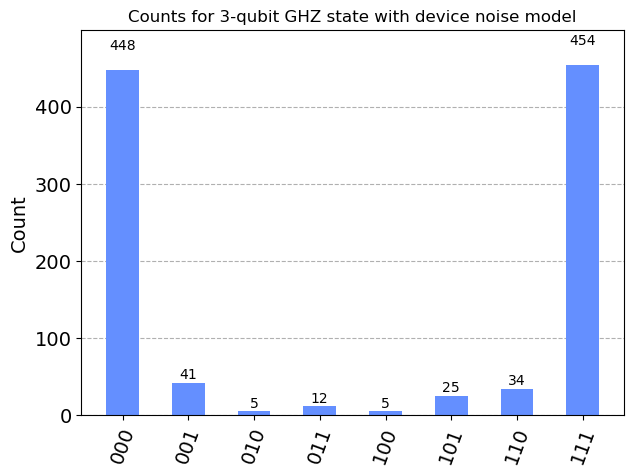

In [23]:
# Execute noisy simulation and get counts
result_noise = sim_vigo.run(tcirc).result()
counts_noise = result_noise.get_counts()
plot_histogram(counts_noise,
               title="Counts for 3-qubit GHZ state with device noise model")

The striking difference to the previous simulation results is that we now have non-zero counts for measurement outcomes other than $|000\rangle$ and $|111\rangle$. How is this possible? 

Real quantum devices suffer from various error sources such as an unwanted interaction of the qubits with their environment, imperfect control or readout errors. As a result, the quantum state undergoes a time evolution during circuit execution that is slightly different from the ideal circuit. In our case this leads to a quantum state with non-zero probabilites to measure the spurious outcomes. In particular, by increasing the number of (simulated) measurements we will never get rid of these spurious outcomes, and hence never reach the ideal 50-50-distribution that we initially calculated.

## 2: An implementation of the Deutsch-Jozsa algorithm 

*Reminder*: The Deutsch-Jozsa Algorithm was briefly discussed at the end of part B of the lecture [Introduction to Quantum Computing](https://wiki.dlr.de/pages/viewpage.action?pageId=393944982). See also section 3 of the article [here](https://arxiv.org/pdf/quant-ph/9708016.pdf) or section 8.1 in [this book](https://link.springer.com/chapter/10.1007/978-3-030-83274-2_8) (PDF accessible from within the DLR network).

Our goal in the following will be to see how this algorithm can be implemented using Qiskit.

### Refresher on the algorithm theory



In this task , we look at the first algorithm that has a proven quantum advantage, the Deutsch-Jozsa algorithm. The problem it solves is stated as the following:

We are given a boolean function $f :  \lbrace 0, 1 \rbrace^n \rightarrow \lbrace 0, 1 \rbrace $ of which we already know that it is either constant or balanced. 

- If the function is *constant*, all function values $f(x)$ are equal to $0$ or all function values are equal to $1$.
- If the function is *balanced*, half of the function values $f(x)$ are equal to $0$, the others are equal to $1$.

Our task is to determine which of both possibilities is realized by $f$.

**With a classical computer** we would sample the (black box) function with test bitstrings $x$.

If $f$ is balanced and we are lucky to obtain two different results already after two test bitstrings, we are done with two function calls and know that $f$ is balanced (best case).
In the worst case, we sample the function with half of the possible bit strings and always obtain the same output. This still allows $f$ either to be constant or to be balanced, the remaining sample bitstrings then all leading to the alternative output we have not seen so far.
Thus, we would need to check more than half of the possible inputs $x$ to be 100% sure, which is $2^{n-1}+1$ function executions for a bitstring of length $n$.

**With a quantum computer** we can solve this problem with an elegant *single* function call by preparing superpositions of all possible bitstrings and evaluating the function on this superposition (Fig. from Qiskit Textbook). 

![djcircuit](https://learn.qiskit.org/content/v2/ch-algorithms/images/deutsch_steps.png)



In short, the algorithm (whose quantum circuit is depicted above) does the following:

- Create a quantum register of bitstring length $n$ in state $|0^{\otimes n} \rangle $ and one ancilla qubit in state $|1 \rangle $
- Use $n$ Hadamard gates to create a superposition of all possible bitstrings $x$ and one Hadamard gate to prepare the ancilla
- Apply the quantum oracle, i.e., the unitary $U_f$ that adds the function value (modulo 2) to the ancilla, that is $|x \rangle |y \rangle \mapsto |x\rangle | y \oplus f(x) \rangle$ (in the computational basis)
- Applying Hadamard gates $H^{\otimes n}$ on the upper register yields our output state, the lower ancilla can be discarded
- Measure the output state

It can be shown that the probability for measuring $|0^{\otimes n} \rangle$ is given by $\left|\frac{1}{2^n} \sum_{x=0}^{2^n-1}(-1)^{f(x)}\right|^2$, 
which is precisely $1$ for a constant $f$ and $0$ for a balanced $f$. Therefore, we just have to observe (exactly once!) if the measurement gives the zero state $|0^{\otimes n} \rangle$ or not in order to determine the type of the function $f$.

### Implementing the algorithm in Qiskit

Let's try this for a small system of $n=3$ bits, starting with the creation of oracles $U_f$ for the function evaluation.

In [24]:
n=3 # length of bit string x

**First we consider the case of an oracle that represents the unitary $U_f$ for a constant function $f$.**

Note that for a constant function $f=1$, the unitary transformation $|x\rangle|y\rangle \mapsto |x\rangle |y \oplus f(x) \rangle$ is equivalent to a Pauli $X$-gate (bit-flip or NOT) acting on the ancilla qubit,  $X|y\rangle$.

On the other hand, the constant function $f=0$ corresponds to the identity transformation $U_f = \hat{1}$ leaving the quantum state invariant.

*Exercise:*

- Write a function that, given a binary constant (0 or 1) and a number of qubits (excluding the ancilla), returns the respective constant oracle as qiskit QuantumCircuit object.

In [25]:
from qiskit import QuantumCircuit

def constant_oracle(const_f: int, n_qubits: int) -> QuantumCircuit:
    """Create a quantum circuit that implements the constant oracle U_f for a given (single digit) binary that encodes the constant function f.
    The number of qubits, excluding a single ancilla qubit, is given by the argument n_qubits. """

    # NOTE Your code goes here

    return None

*Solution*

In [33]:
# %load "./solutions/dj_ora_c.py"

**Next we consider the case of an oracle that represents the unitary $U_f$ for a balanced function $f$.**

For simplicity we will now focus on the subset of balanced functions that may easily constructed by the following construction.
We only need to specifiy an $n$-bit string $b$ as input for our construction.

Given such a $b$, the unitary $U_f$ can be constructed by two ingredients:

- a sequence $\mathcal{C}$ of two-qubit $C\!X$-gates each acting on an input qubit $x_i$ and the ancilla $y$, that is $\mathcal{C} = \prod_{i=1}^{n} C\!X_{i,y}$, 
- a product $\mathcal{X}$ of single qubit $X$-gates each acting on an input qubit $x_i$,  that is $\mathcal{X} = \prod_{i=1}^{n} X_{i}^{b}$.

Here we see that $b$ is a bit string that indicates which $X$-gates must be placed to implement the function $f=f_b$.
The unitary $U_f$ is then given by the product $U_f = \mathcal{X}\mathcal{C}\mathcal{X}$. 

*Exercises:* 

- Implement the balanced oracle $U_f$ as a quantum circuit, taking as argument a bitstring $b$ (like "101").
- Given the bitstring $b=101$, what is the corresponding function $f_b$? Give the outputs $f_b(x)$ for all classical bit strings $x \in \lbrace 0, 1\rbrace^3$.

In [45]:
from qiskit import QuantumCircuit

def balanced_oracle(bitstring: str) -> QuantumCircuit:
    """Create a quantum circuit that implements the unitary oracle U_f for a given bitstring that encodes the balanced function f.
    The number of qubits, excluding a single ancilla qubit, is given by the length of the bitstring. """

    # NOTE Your code goes here

    return None

*Solution*

In [29]:
# %load "./solutions/dj_ora_b1.py"

┌───┐          
q_0: ──■──┤ X ├──────────
       │  └───┘          
q_1: ──┼────■────────────
       │    │       ┌───┐
q_2: ──┼────┼────■──┤ X ├
     ┌─┴─┐┌─┴─┐┌─┴─┐└───┘
q_3: ┤ X ├┤ X ├┤ X ├─────
     └───┘└───┘└───┘

In [67]:
# %load "./solutions/dj_ora_b2.py"

**Combine the oracle with the rest of the circuit**

Now we have oracles for two different function types, one is balanced, the other is constant. Now, we build the full algorithm that is just lacking Hadamard gates.

*Exercise:*

- Now construct a function that yields a full DJ quantum circuit, given an oracle circuit as argument.

In [44]:
def djqc(oracle: QuantumCircuit) -> QuantumCircuit:

    # NOTE your code goes hoere

    return None


# Example usage:
#dj_circuit = djqc(balanced_oracle("101"))
#dj_circuit.draw()

CircuitError: 'Index 0 out of range for size 0.'

*Solution*

In [42]:
# %load "./solutions/dj_join.py"

┌───┐          ┌───┐           ░ ┌───┐┌─┐      
q_0: ┤ H ├───────■──┤ X ├───────────░─┤ H ├┤M├──────
     ├───┤       │  └───┘           ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├───────┼────■─────────────░─┤ H ├─╫─┤M├───
     ├───┤       │    │       ┌───┐ ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├───────┼────┼────■──┤ X ├─░─┤ H ├─╫──╫─┤M├
     ├───┤┌───┐┌─┴─┐┌─┴─┐┌─┴─┐└───┘ ░ ├───┤ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├┤ X ├┤ X ├┤ X ├──────░─┤ H ├─╫──╫──╫─
     └───┘└───┘└───┘└───┘└───┘      ░ └───┘ ║  ║  ║ 
c: 3/═══════════════════════════════════════╩══╩══╩═
                                            0  1  2

Now that we have the full Deutsch-Josza algorithm for our function encoded in balanced_oracle, we can check if it gives the right answer

In [43]:
dj_circuit = djqc(balanced_oracle("101"))

#job_sim = aersim.run(dj_circuit, shots=1024)
job_sim = sim_vigo.run(qi.transpile(dj_circuit, sim_vigo))
result_sim = job_sim.result()
counts = result_sim.get_counts()

from qiskit.visualization import plot_histogram
plot_histogram(counts, title="Measurement results")

What would it look like for the constant oracle? Please try yourself!

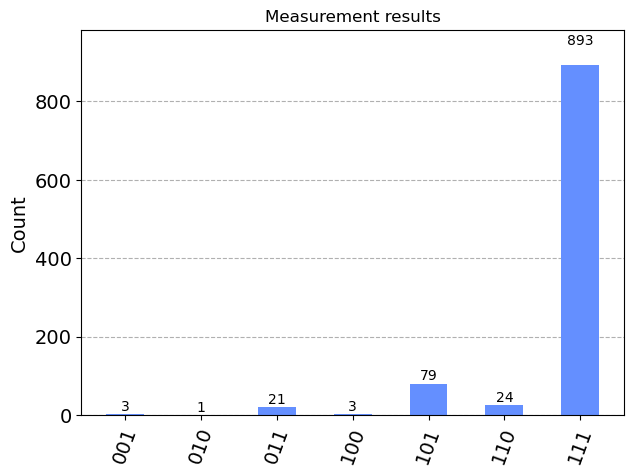

In [44]:
dj_circuit = djqc(constant_oracle(1,3))

#job_sim = aersim.run(dj_circuit, shots=1024)
job_sim = sim_vigo.run(qi.transpile(dj_circuit, sim_vigo))
result_sim = job_sim.result()
counts = result_sim.get_counts()

from qiskit.visualization import plot_histogram
plot_histogram(counts, title="Measurement results")

Although the Deutsch-Jozsa algorithm gives a huge quantum advantage, the problem it solves is of mere academic interest.

## 3: Data encoding

In the above discussions, we have ignored the aspect of bringing classical data to the quantum computer for further (quantum) computing.
For instance for quantum machine learning, the question of how to map real valued feature data to quantum states naturally arises.

Here we give a synopsis some simple data encoding methods.
This material is taken from the [Qiskit Machine Learning Tutorial](https://learn.qiskit.org/course/machine-learning/data-encoding).

#### Basis encoding of a data set


Your data set consists of $M$ bit strings $b^m=(b^m_1, ..., b^m_{N})$, which each have a length of $N$ bits.
The $M$ strings do not have to be pairwise different.
Each classical data point is a point in the $2^N$-element input space $\{0,1 \}^N$.

Depending on your use case, a bit (sub)string might for instance represent an integer or some binary features of the respective data point.


In basis encoding you create a single quantum state $|\psi\rangle \in \mathbb{C}^{2^N} $, whose coefficients reflect the relative frequency of a data point in input space:
$\begin{equation} | \psi \rangle = \frac{1}{\sqrt{M}} \sum_{m=1}^{M} |b^{m}\rangle \end{equation}$
Note that $|b^m \rangle =|b^m_1, ..., b^m_{N} \rangle$ labels a computational basis state of the $N$-qubit system and may occur more than once in the above sum. 


#### Amplitude encoding of a data set

Your data set consists of $M$ real (or complex) vectors $x^m=(x^m_1, \dots , x^m_{N})$, which each have a length of $N$ entries.
The $M$ vectors do not have to be pairwise different.
Each classical data point is a point in the $N$-real dimensional input space $\mathbb{R}^N$ (or $\mathbb{C}^N$).

We concaten the $M$ vectors to a vector of length $MN$ and normalize it to a Euclidean norm of 1 by multiplying with a suitable constant $c$:
$\begin{equation} \hat{x} = c \ (x^1_1, \dots ,  x^1_N, \dots , x^M_{N}) \end{equation}$

By extending with zeros, we may also assume that  $NM=2^n$ for some integer $n$.

In amplitude encoding you create a single quantum state $|\psi\rangle \in \mathbb{C}^{NM}$ as follows:
$\begin{equation} | \psi \rangle =  \sum_{i=1}^{MN} \hat{x}_{i} | i \rangle \end{equation}$
Note that $|i\rangle$ labels a computational basis state of the $n\geq \log_2(MN)$-qubit system (think of $i$ being written out in the binary system).

A normalization of the input vectors $x^m$ might be needed before the encoding just described in order to weight the feature dimensions suitably.

#### Dense angle encoding of a data point

Single, suitably rescaled, data points $x\in [0, 2\pi)^{N}$ may be encoded by (dense) angle encoding as follows.
By possibly adding a zero, we assume $N$ to be even. Then $x$ may be encoded by $N/2$ qubits via:
$\begin{equation} |\psi \rangle = \bigotimes_{i=1}^{N/2} \left[ \cos( x_{2i-1}) |0\rangle + e^{\text{i} x_{2i}} \sin( x_{2i-1}) |1\rangle \right] \end{equation}$

*Exercise*

- Implement a function for dense angle encoding following the construction just given.

In [ ]:
# Show a hint
# showsolution("./solutions/dae_hint.md")

In [ ]:
# %load "./solutions/dae_circ.py"

#### More complicated encodings of a data point

We can also use more complicated patterns of single- or multiqubit gates. Generically, each feature dimension $x_i$ is then mapped to a rotational parameter $\theta_i$ of a quantum gate. Rotational gates can also be intertwined with entangling CNOT gates. The resulting state vector thus yields a high-dimensional representation of the input vector that can be used for further processing.

The qiskit circuit library also provides some standard parametrized quantum circuits, such as the following.

In [ ]:
from qiskit.circuit.library import EfficientSU2

# Generate a generic circuit of the class (so far without explicit values assigned to the parameters)
circuit = EfficientSU2(num_qubits=3, reps=1, insert_barriers=True)
circuit.decompose().draw()

In [ ]:
# We can now bind  the above theta parameters to specific values
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]
encode = circuit.bind_parameters(x)
encode.decompose().draw()

## 4: More things to learn

Now you should be well-prepared to go own jour own journey and explore quantum computing (applications) with Qiskit.

Easily accesible material is for instance found under
https://qiskit.org/learn

If you are for instance interested in Quantum Machine Learning (QML), you could do the QML course linked there. The literature references linked in the course are also worth reading.
In case you immediately want to see some worked QML examples in Qiskit, you could also look at the QML tutorials under:
https://qiskit.org/ecosystem/machine-learning/tutorials/index.html